**Introduction:** **Loan Prediction using Machine Learning**

The ability to accurately predict loan approvals plays a crucial role in the financial sector, aiding lenders in assessing the creditworthiness of potential borrowers. With the advancements in machine learning techniques, developing a robust loan prediction model has become increasingly feasible. In this project, we aim to leverage machine learning algorithms to predict whether a loan application will be approved or not, based on various applicant attributes.

In [51]:
# Installing and importing necessary packages
import pandas as pd
import numpy as np
import seaborn as sns

#visualisation
import matplotlib.pyplot as plt
import graphviz
from sklearn import tree

#Statistical analysis
from scipy.stats import skew
from scipy.stats import shapiro
from scipy import stats

#preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#Feature_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

#Model implementation
from sklearn.tree import DecisionTreeClassifier

#Model evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# **Data aquisition :**

In [3]:
df = pd.read_csv('/content/loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


- **Dataset Description:**
The dataset we will be using contains information related to loan applications. It consists of several features that can potentially influence the loan approval decision, such as the gender of the applicant, marital status, number of dependents, educational background, employment status, income details, loan amount, loan term, credit history, property area, and the final loan status (approved or not approved).


- **Target Variable**:
In this loan prediction task, our target variable is the "Loan_Status" column. It represents the final decision of whether a loan application was approved or not. This is a binary classification problem, where "Y" indicates an approved loan and "N" indicates a loan that was not approved.

# **Hypothesis :**


- The credit history of the loan applicant, combined with their income and education level, will have a significant impact on the loan approval decision. Specifically, applicants with a good credit history, higher income, and a graduate level of education will have a higher likelihood of loan approval. Additionally, factors such as the loan amount, loan term, and property area may also influence the loan approval decision, albeit to a lesser extent.


- To validate this hypothesis, we can perform exploratory data analysis, feature engineering, and model training. By examining the relationships between the variables and the target variable (Loan_Status), we can assess the relative importance of different features and gain insights into their impact on loan approval.

# **Exploratory Data analysis :**

## **Summary:**

Basic analysis on the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 67.2+ KB


In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are missing values present.

## **Descriptive statistics** :

Descriptive statistics is a branch of statistical analysis that focuses on summarizing and interpreting data. It provides measures such as mean, median, and standard deviation to describe the central tendencies and variability within a dataset. By organizing and visualizing data through techniques like histograms and box plots, descriptive statistics offers insights into data distributions and patterns. It is used to gain a comprehensive understanding of the dataset and inform further analysis and decision-making

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [7]:
# taking only numerical features for boxplots
df_c = []
for i in df.columns:

  if df[i].dtype == 'float64' or df[i].dtype == 'int64':
    df_c.append(df[i])


df_c = pd.concat(df_c, axis=1)
df_c

# dropping credit_history as it is categorical
df_c.drop('Credit_History', axis = 1,  inplace = True)

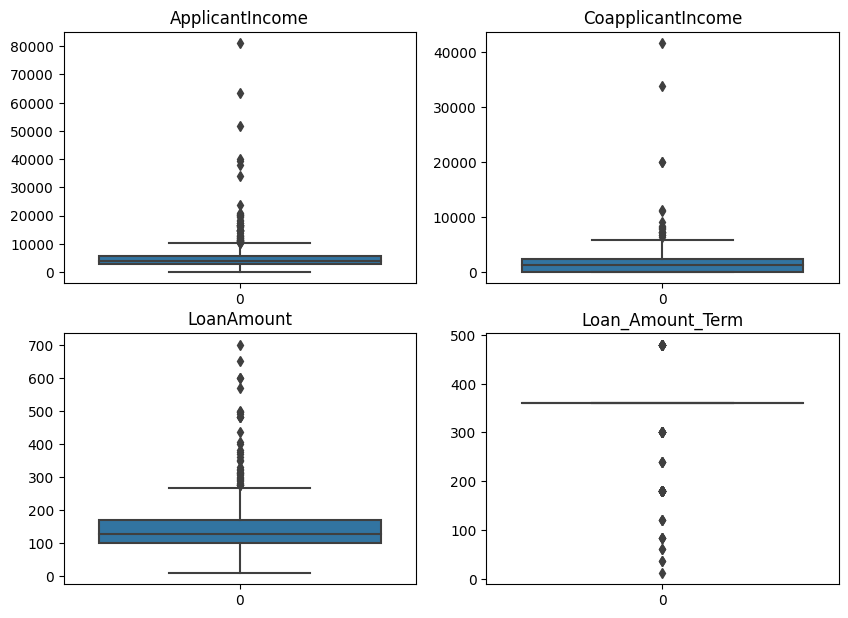

In [8]:
plt.figure(figsize = (10,15))

for i,v in enumerate(df_c.columns):
  plt.subplot(4,2,i+1)
  sns.boxplot(df_c[v])
  plt.title(v)

Checking for skewnwss

In [9]:
for i in df_c.columns:
  sk = skew(df[i])
  if sk>0:
    print("The skewness of column {0} is Posititve  ".format(i))
  else:
    print("The skewness of column {0} is Negative  ".format(i))

The skewness of column ApplicantIncome is Posititve  
The skewness of column CoapplicantIncome is Posititve  
The skewness of column LoanAmount is Negative  
The skewness of column Loan_Amount_Term is Negative  


Checking for Normality

In [10]:
alpha = 0.05 #set significance level
for column in df_c.columns:
    column_data = df_c[column]
    statistic, p_value = shapiro(column_data)
    #print the test result for the current column
    print("Column:", column)
    print("Statistic:", statistic)
    print("p_value:", p_value)

    #check for normality per column
    if (p_value < alpha):
        print("The data does not follow normal distribution")
        print()
    else:
        print("The data follows normal distribution")
        print()

Column: ApplicantIncome
Statistic: 0.47126346826553345
p_value: 4.8126138406832944e-39
The data does not follow normal distribution

Column: CoapplicantIncome
Statistic: 0.48150163888931274
p_value: 8.946127616988567e-39
The data does not follow normal distribution

Column: LoanAmount
Statistic: nan
p_value: 1.0
The data follows normal distribution

Column: Loan_Amount_Term
Statistic: nan
p_value: 1.0
The data follows normal distribution




Based on the output you provided, the skewness of the "LoanAmount" column is negative, and the skewness of the "Loan_Amount_Term" column is negative as well. This indicates that both columns are skewed to the left.

However, when checking for normality using the Shapiro-Wilk test, the "LoanAmount" column has a p-value of 1.0, suggesting that it follows a normal distribution. The "Loan_Amount_Term" column also has a p-value of 1.0, indicating that it follows a normal distribution as well.

Therefore, while both columns exhibit negative skewness, indicating a departure from a perfectly symmetrical distribution, the Shapiro-Wilk test suggests that they still follow a normal distribution.

Overall, the "LoanAmount" and "Loan_Amount_Term" columns are considered to be normally distributed based on the Shapiro-Wilk test.

## **Univariate Analysis** :

Analyzing each feature individually. For categorical features, examine the frequency distribution of different categories. For numerical features, visualize their distribution using histograms, box plots, or density plots.

In [11]:
for i in  df.columns:
  if df[i].dtype == 'object':
    print("The object columns are : ",i)
  elif df[i].dtype == 'float64':
    print()
    print("The float columns are : ",i)

  else:
     print("The int columns are : ",i)

The object columns are :  Loan_ID
The object columns are :  Gender
The object columns are :  Married
The object columns are :  Dependents
The object columns are :  Education
The object columns are :  Self_Employed
The int columns are :  ApplicantIncome

The float columns are :  CoapplicantIncome

The float columns are :  LoanAmount

The float columns are :  Loan_Amount_Term

The float columns are :  Credit_History
The object columns are :  Property_Area
The object columns are :  Loan_Status


<Axes: >

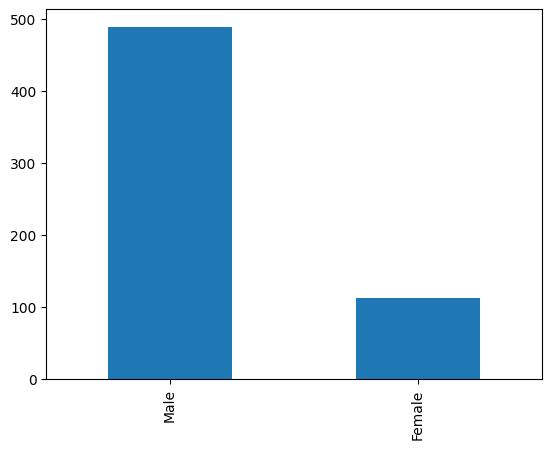

In [12]:
df['Gender'].value_counts().plot.bar()

Text(0.5, 1.0, 'Married')

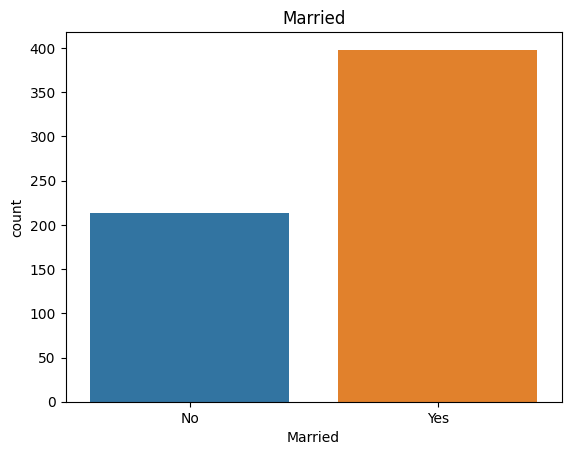

In [13]:
sns.countplot(x = 'Married', data = df)
plt.title('Married')

<Axes: >

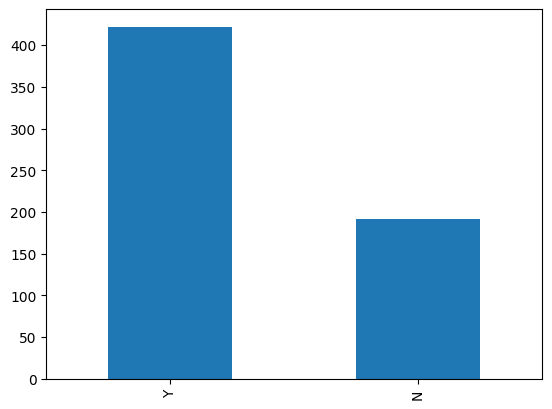

In [14]:
df['Loan_Status'].value_counts().plot.bar()

<Axes: xlabel='Property_Area', ylabel='count'>

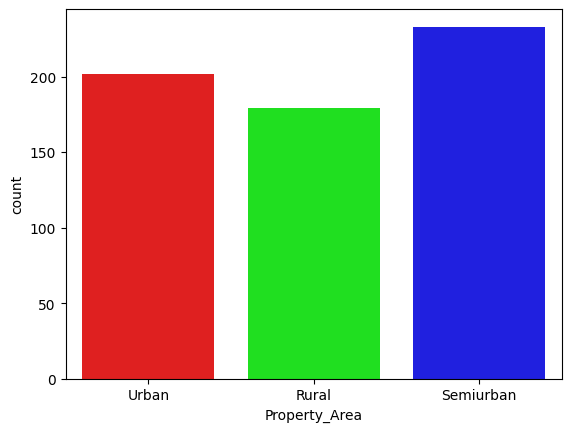

In [15]:
#df['Property_Area'].value_counts().plot.bar()

import seaborn as sns

# Define a color palette with different colors
colors = ['#FF0000', '#00FF00', '#0000FF']

# Create the countplot with the specified color palette
sns.countplot(x='Property_Area', data=df, palette=colors)


<Axes: xlabel='Education', ylabel='count'>

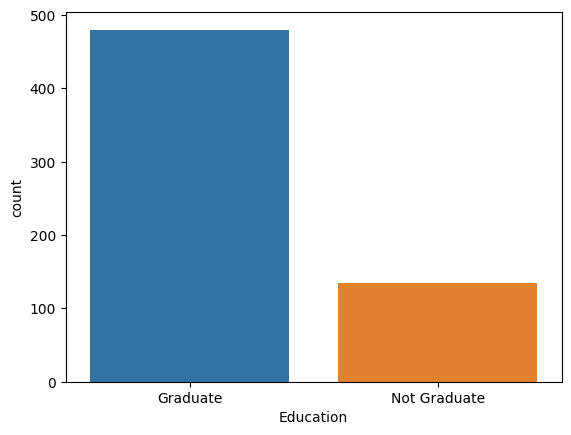

In [16]:
sns.countplot(x = 'Education', data = df)

<Axes: >

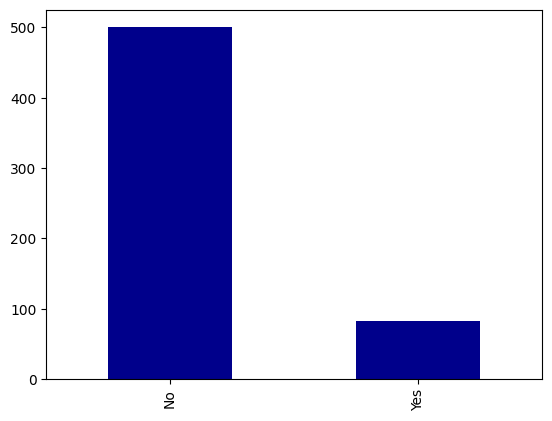

In [17]:
df['Self_Employed'].value_counts().plot.bar(color = 'darkblue')

<Axes: >

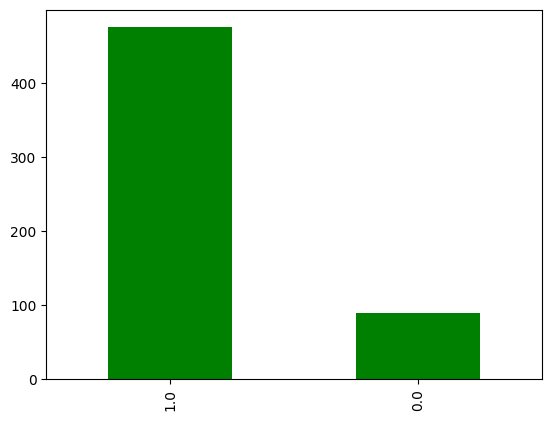

In [18]:
df['Credit_History'].value_counts().plot.bar(color = 'green')


<Axes: ylabel='CoapplicantIncome'>

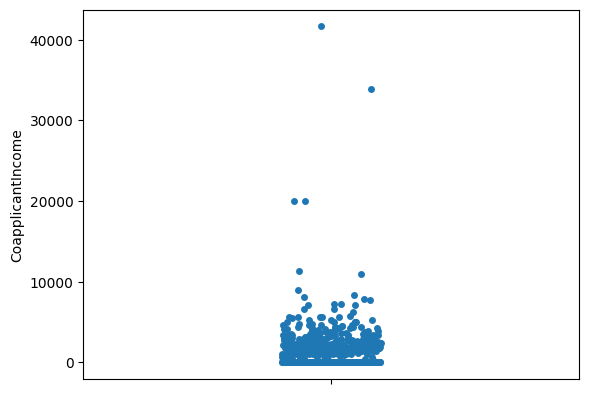

In [19]:
sns.stripplot(df['CoapplicantIncome'])

<Axes: ylabel='ApplicantIncome'>

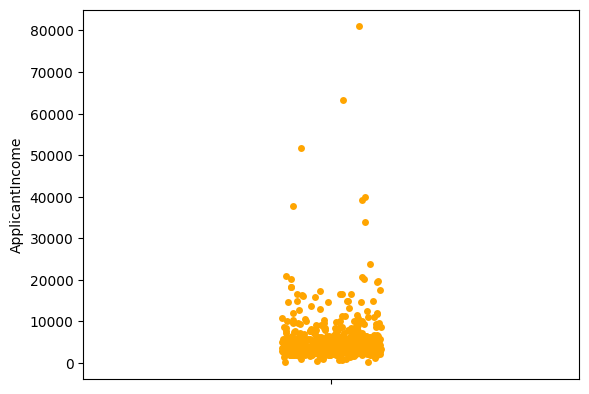

In [20]:

sns.stripplot(df['ApplicantIncome'], color = 'Orange')


<Axes: xlabel='LoanAmount', ylabel='Count'>

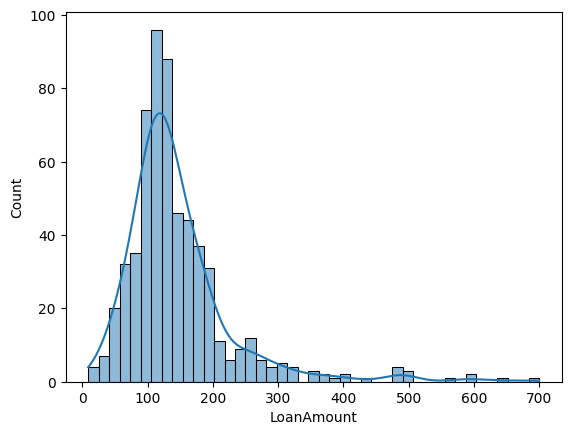

In [21]:
sns.histplot(df['LoanAmount'], kde = 1)

<Axes: xlabel='Loan_Amount_Term', ylabel='Count'>

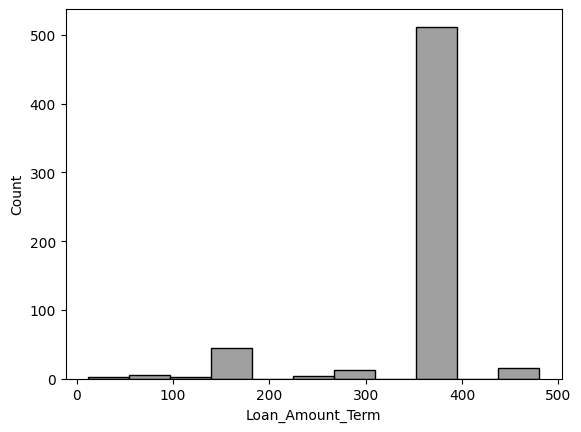

In [22]:
sns.histplot(df['Loan_Amount_Term'], color = 'Gray')

**OBSERVATION**

During the univariate analysis of the loan prediction dataset, the following insights were observed:

- Gender: The dataset is predominantly composed of males, accounting for approximately 80% of the records.

- Marital Status: Around 400 individuals in the dataset are married, while approximately 200 individuals are unmarried.

- Loan Approval: Out of the total records, around 400 loans were approved, while 200 loans were not approved.

- Property Area: The distribution of property areas shows that the majority of the properties are located in semi-urban areas, followed by urban areas, and rural areas.

- Education: Approximately 450 individuals in the dataset are graduates, while the remaining individuals have not completed their education.

- Self-Employment: Around 450 individuals in the dataset are self-employed.

- Credit History: A significant majority, around 80%, of the individuals have a credit history.

- Co-applicant Income: The analysis revealed that most of the co-applicant incomes fall within the range of 1000 to 10000.

- Applicant Income: The majority of the applicant incomes lie between 5000 and 30000.

- Loan Amount: The distribution of loan amounts exhibits right skewness, indicating that there are relatively fewer instances of high loan amounts.

## **Bivariate Analysis:**


Bivariate analysis is an analytical technique used to explore the relationship between two variables in a dataset. It aims to understand how changes in one variable are associated with changes in another variable.

- Loan_Status and Gender: Explore the relationship between loan approval status and gender. Determine if there is any difference in loan approval rates between males and females.

- Loan_Status and Education: Analyze the relationship between loan approval status and education level. Investigate if there is a difference in loan approval rates between graduates and non-graduates.

- Loan_Status and Credit_History: Examine the association between loan approval status and credit history. Determine if having a good credit history increases the likelihood of loan approval.

- Loan_Status and Property_Area: Investigate the relationship between loan approval status and the property area. Determine if the property location (urban, rural, or semi-urban) influences loan approval rates.

- LoanAmount and ApplicantIncome: Analyze the correlation between the loan amount and the applicant's income. Determine if there is a positive or negative relationship between the two variables.

- LoanAmount and Loan_Amount_Term: Explore the association between the loan amount and the loan repayment term. Investigate if longer loan terms are associated with higher loan amounts.

Categorical column

<Axes: xlabel='Loan_Status', ylabel='count'>

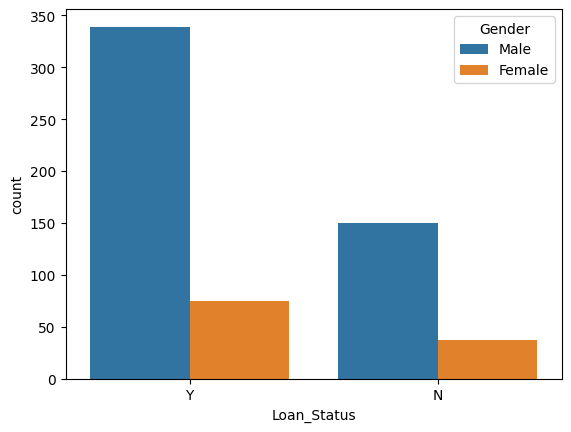

In [23]:
sns.countplot(x='Loan_Status', hue='Gender', data=df)

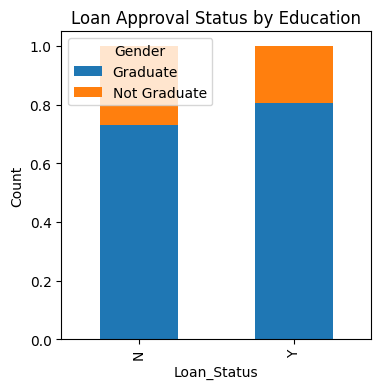

In [24]:
g = pd.crosstab(df['Loan_Status'], df['Education'])
g.div(g.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4, 4))

plt.xlabel('Loan_Status')
plt.ylabel('Count')
plt.title('Loan Approval Status by Education')
plt.legend(title='Gender')

plt.show()


- g.sum(1): This calculates the sum of each row in the cross-tabulation table g. It represents the total count of loan applications for each loan status category.

- g.sum(1).astype(float): The .astype(float) converts the sum values to float data type. This is necessary for the subsequent division operation.

- g.div(g.sum(1).astype(float), axis=0): This line performs element-wise division between the cross-tabulation table g and the row sums. The div() function divides each element of g by the corresponding row sum, resulting in proportions.

- g: The original cross-tabulation table representing loan approval status and education level.
- g.sum(1).astype(float): The row sums converted to float data type.
axis=0: Specifies that the division should be performed along the rows (axis=0), i.e., dividing each row of g by the corresponding row sum.
The result is a new table where each element represents the proportion of loan applications with a specific loan status and education level combination out of the total count of loan applications for that loan status.

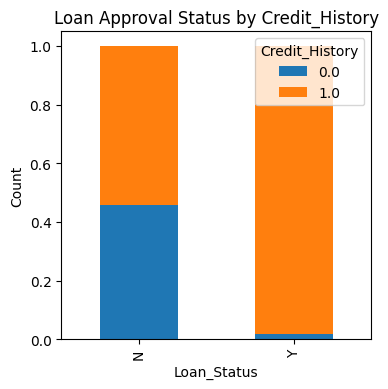

In [25]:
#Loan_Status and Credit_History

c = pd.crosstab(df['Loan_Status'],df['Credit_History'])
c.div(c.sum(1).astype(float), axis = 0).plot(kind = 'bar',stacked = True, figsize = (4, 4))

plt.xlabel('Loan_Status')
plt.ylabel('Count')
plt.title('Loan Approval Status by Credit_History')
plt.legend(title='Credit_History')

plt.show()


<Axes: xlabel='Loan_Status', ylabel='count'>

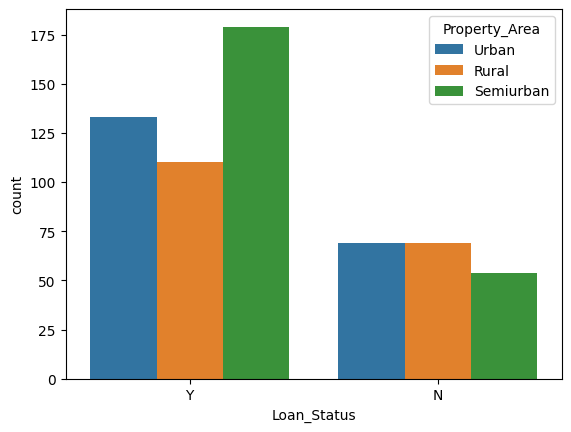

In [26]:
#Loan_Status and Property_Area

sns.countplot(x='Loan_Status', hue='Property_Area', data=df)


Numerical columns

<Axes: xlabel='LoanAmount', ylabel='ApplicantIncome'>

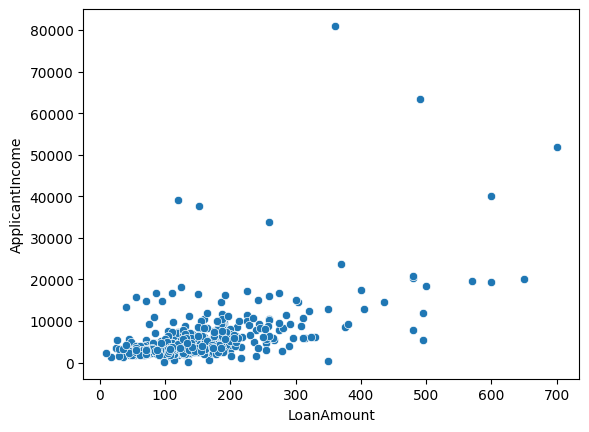

In [27]:
# LoanAmount and ApplicantIncome:

sns.scatterplot(x = 'LoanAmount', y = 'ApplicantIncome', data = df)

<Axes: xlabel='LoanAmount', ylabel='Loan_Amount_Term'>

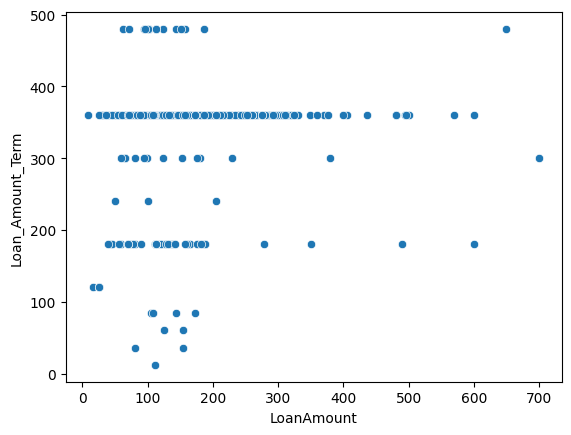

In [28]:
# LoanAmount and Loan_Amount_Term

sns.scatterplot(x = 'LoanAmount', y = 'Loan_Amount_Term', data= df)

**OBSERVATION**

1. **Gender Influence**:
Among the loan applicants, 75% of the approved candidates were male, indicating a higher loan approval rate for males. On the other hand, 60% of the non-approved candidates were also male, suggesting a gender disparity in loan approvals.

2. **Education Impact**:
Educational background played a significant role in loan approval. Around 80% of the approved candidates were graduates, while 70% of the non-approved candidates were also graduates. This implies that being a graduate increases the chances of loan approval.

3. **Credit History Significance**:
The presence of a credit history greatly influenced loan approval. Approximately 95% of the approved candidates had a credit history, emphasizing the importance of a good credit record. In contrast, 45% of the non-approved candidates lacked a credit history, indicating a higher likelihood of loan rejection without a credit history.

4. **Property Area Differentiatio**:
The property area was found to have an impact on loan approval rates. Most of the approved candidates resided in semi-urban areas, while urban areas ranked second. Conversely, loan rejections were equally distributed between urban and rural areas. This suggests that the property location can influence the loan approval decision.

# **Data cleaning and Preprocessing**:

## Filling in missing values

In [29]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [30]:
df['Gender'].fillna(df['Gender'].mode().iloc[0], inplace=True)
df['Married'].fillna(df['Married'].mode().iloc[0], inplace =True)
df['Dependents'].fillna(df['Dependents'].mode().iloc[0], inplace =True)
df['Self_Employed'].fillna(df['Self_Employed'].mode().iloc[0], inplace =True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace = True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode().iloc[0], inplace =True)
df.dropna(inplace = True)


In [31]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

**Gender**: We used the mode (most frequent value) to fill the missing values in the 'Gender' column. The mode is a suitable choice for categorical variables like gender because it provides the value that occurs most frequently in the column. By filling missing values with the mode, we impute the missing values with the most common gender category.

**Married**: Similarly, we used the mode to fill missing values in the 'Married' column. By replacing missing values with the mode, we impute them with the most frequent marital status category.

**Dependents**: The 'Dependents' column represents the number of dependents a person has. Since it is a categorical variable, we again used the mode to fill missing values. The mode provides the most common number of dependents among the available data.

**Self_Employed**: The 'Self_Employed' column indicates whether the applicant is self-employed or not. We filled missing values with the mode, which represents the most frequent category (either 'Yes' or 'No') among the available data.

**LoanAmount**: The 'LoanAmount' column represents the amount of the loan. Since it is a numerical variable, we used the mean value to fill the missing values. The mean provides a reasonable estimate of the loan amount based on the available data.

**Loan_Amount_Term**: This column specifies the term (in months) of the loan. We filled missing values with the mode, which represents the most common loan term among the available data.

**Credit_History**: Since there were 50 missing values in the 'Credit_History' column, we created a new category ('Unknown') to represent the missing values. By assigning a distinct category for missing values, we can retain the information that these values were not available.

Each column was handled differently based on its data type (categorical or numerical) and the most appropriate method for imputing missing values in that context. These methods aim to preserve the integrity of the data and provide reasonable estimates or representations for the missing values.








In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 564 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            564 non-null    object 
 1   Gender             564 non-null    object 
 2   Married            564 non-null    object 
 3   Dependents         564 non-null    object 
 4   Education          564 non-null    object 
 5   Self_Employed      564 non-null    object 
 6   ApplicantIncome    564 non-null    int64  
 7   CoapplicantIncome  564 non-null    float64
 8   LoanAmount         564 non-null    float64
 9   Loan_Amount_Term   564 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      564 non-null    object 
 12  Loan_Status        564 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 61.7+ KB


In [33]:
for col in df.columns:
    if df[col].dtype == 'object':
        unique_values = df[col].nunique()
        print("column {} has  {} values".format(col,unique_values))
        print()


column Loan_ID has  564 values

column Gender has  2 values

column Married has  2 values

column Dependents has  4 values

column Education has  2 values

column Self_Employed has  2 values

column Property_Area has  3 values

column Loan_Status has  2 values



In [34]:
# we won't be needing LOAN_ID
df.drop('Loan_ID',axis = 1, inplace = True)

## Converting categorical columns into numerical using LabelEncoder

In [35]:
from sklearn.preprocessing import LabelEncoder
cat_Cols = df.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History'], axis = 1)


# Create a new dataframe to store the encoded values
encoded_df = df.copy()

# Initialize LabelEncoder
encoder = LabelEncoder()
for col in cat_Cols:
  encoded_df[col] = encoder.fit_transform(  encoded_df[col])

# Print the new DataFrame with label encoded features
encoded_df


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


## Fixing skewedness

Histogram - Kurtosis and skewness.
Normal probability plot - Data distribution should closely follow the diagonal that represents the normal distribution.

In [36]:
# df_c column contained numeical dtypes of our dataset
for i in df_c.columns:
    sk = skew(encoded_df[i])
    if sk > 0:
      print("Positive skewness column:", i)
    else:
      print("Negative skewness column:", i)


Positive skewness column: ApplicantIncome
Positive skewness column: CoapplicantIncome
Positive skewness column: LoanAmount
Negative skewness column: Loan_Amount_Term


- np.log: This function calculates the natural logarithm of a given value. It is the inverse operation of exponentiation. It is commonly used to transform data that has a skewed distribution towards higher values.

- np.sqrt: This function calculates the square root of a given value. It is a mathematical operation that returns the value which, when multiplied by itself, gives the original value. It is often used to transform data with a right-skewed distribution.

- np.cbrt: This function calculates the cube root of a given value. It is the value that, when multiplied by itself twice, gives the original value. Cube root transformation is useful for reducing the impact of extreme values and achieving a more symmetrical distribution.

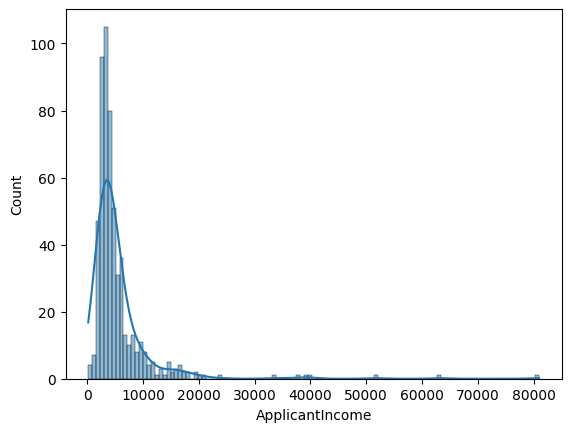

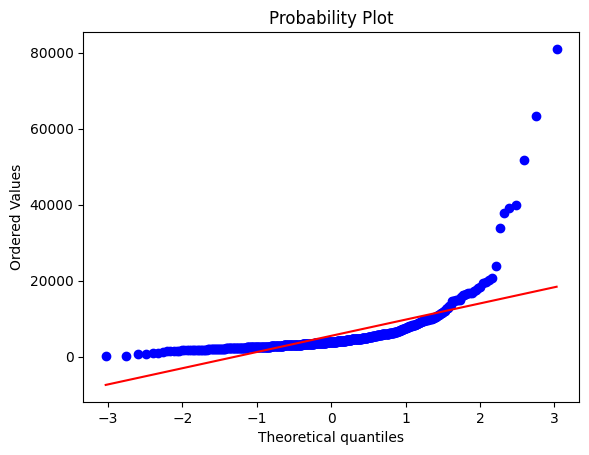

In [37]:
# before logarithmic transormation
sns.histplot(encoded_df['ApplicantIncome'], kde = True)
plt.figure()
pp = stats.probplot(encoded_df['ApplicantIncome'], plot=plt)

In [38]:
# Applying Logarithmic Transformation
encoded_df['ApplicantIncome'] = np.log(encoded_df['ApplicantIncome'])

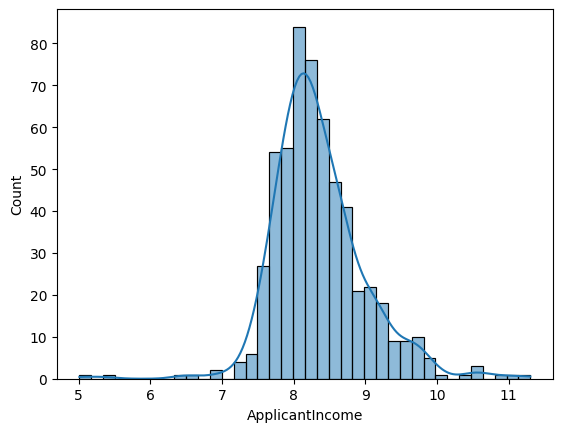

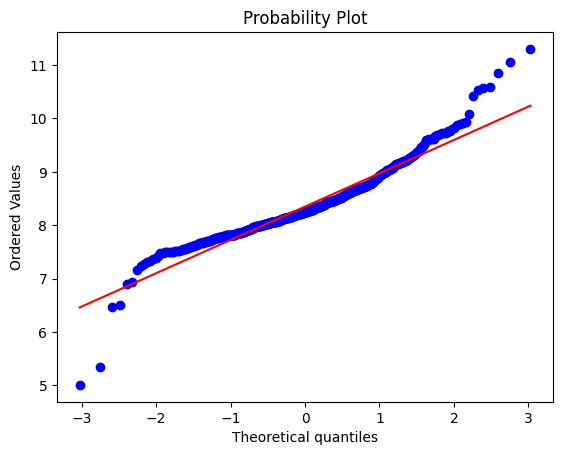

In [39]:
sns.histplot(encoded_df['ApplicantIncome'], kde = True)
plt.figure()
pp = stats.probplot(encoded_df['ApplicantIncome'], plot = plt)

Way better!

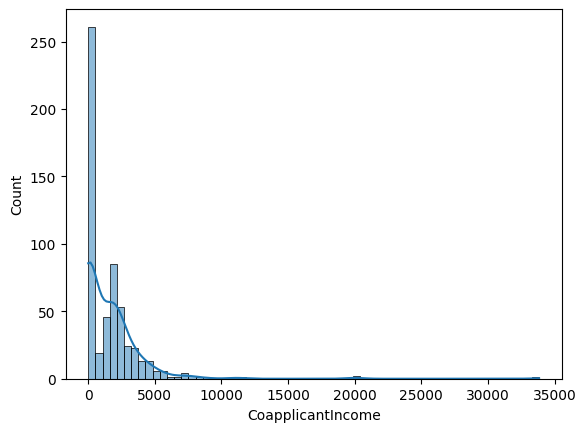

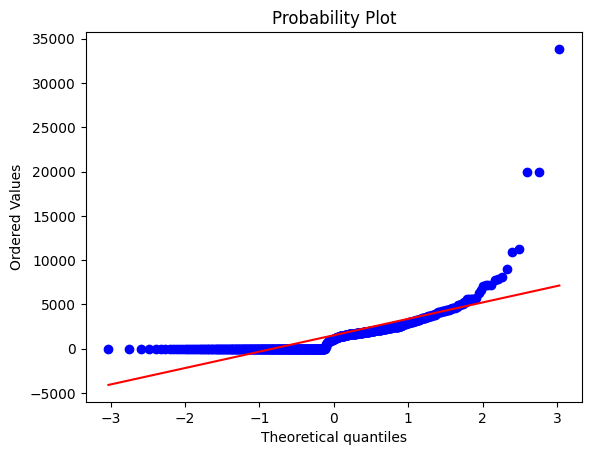

In [40]:
# Getting the second skewed feature ready

sns.histplot(df['CoapplicantIncome'], kde = True)
plt.figure()
pp= stats.probplot(df['CoapplicantIncome'], plot = plt)

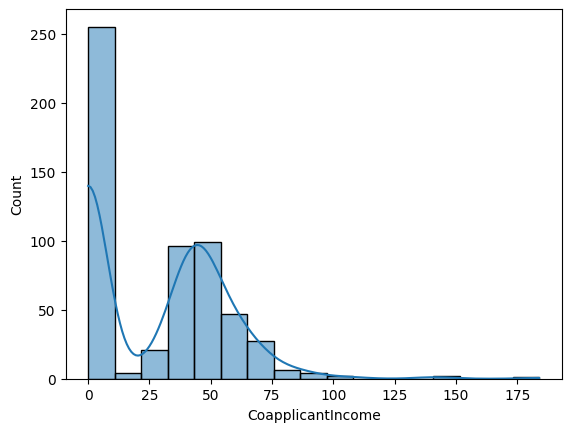

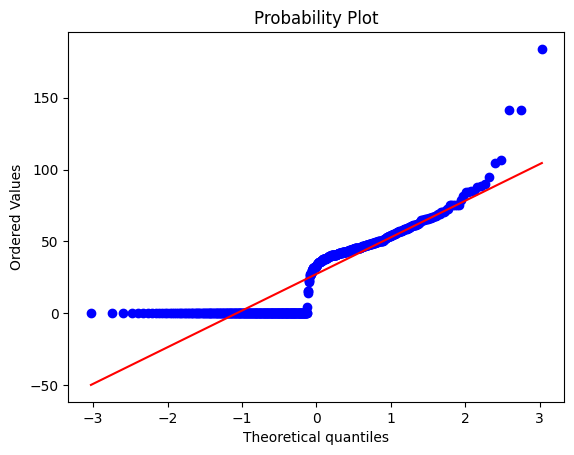

In [41]:
# used cbrt/sqrt because this feature contained zero/negative values which makes logarithmic function not accurate
encoded_df['CoapplicantIncome'] = np.sqrt(encoded_df['CoapplicantIncome'])
sns.histplot(encoded_df['CoapplicantIncome'], kde = True)
plt.figure()
pp = stats.probplot(encoded_df['CoapplicantIncome'], plot = plt)

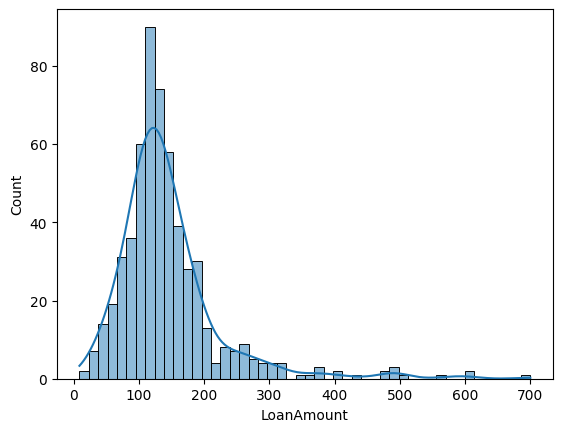

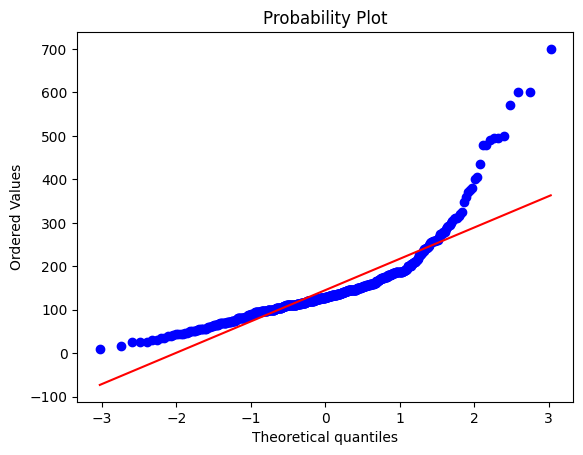

In [42]:
# gettin the third feature ready
sns.histplot(encoded_df['LoanAmount'], kde = True)
plt.figure()
pp = stats.probplot(encoded_df['LoanAmount'], plot = plt)

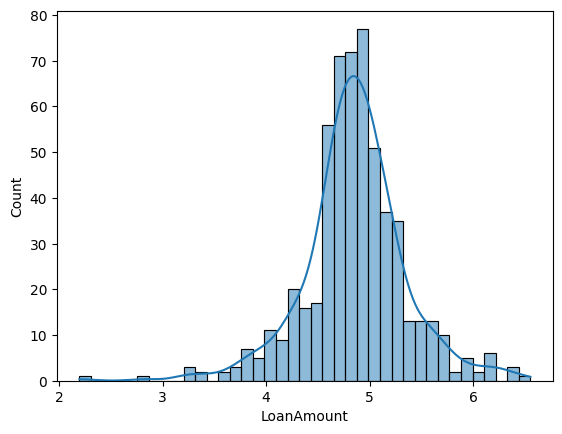

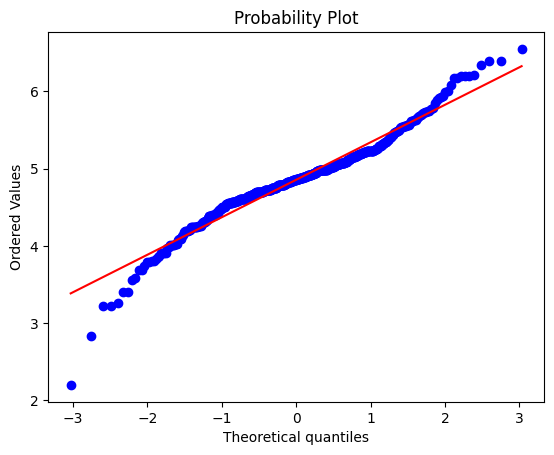

In [43]:
#Applying logarithmic transformation

encoded_df['LoanAmount'] = np.log(encoded_df['LoanAmount'])
sns.histplot(encoded_df['LoanAmount'], kde =True)
plt.figure()
pp = stats.probplot(encoded_df['LoanAmount'], plot = plt)

# **Data  Analysis**:

Correlation

In [ ]:
encoded_df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.361578,0.181573,0.041325,0.005868,0.048933,0.154705,0.105413,-0.079595,0.013472,-0.029238,0.039194
Married,0.361578,1.000000,0.352476,0.006266,0.026912,0.057886,0.119898,0.169870,-0.104448,0.006082,0.014193,0.086430
Dependents,0.181573,0.352476,1.000000,0.029882,0.054517,0.129492,-0.011969,0.184054,-0.094818,-0.038702,0.002714,0.024601
Education,0.041325,0.006266,0.029882,1.000000,-0.013871,-0.142372,-0.054520,-0.166952,-0.086550,-0.081822,-0.058673,-0.098340
Self_Employed,0.005868,0.026912,0.054517,-0.013871,1.000000,0.129326,0.001132,0.105684,-0.035587,-0.002362,-0.041709,-0.013426
ApplicantIncome,0.048933,0.057886,0.129492,-0.142372,0.129326,1.000000,-0.126174,0.564836,-0.061693,-0.014715,-0.015892,-0.004530
CoapplicantIncome,0.154705,0.119898,-0.011969,-0.054520,0.001132,-0.126174,1.000000,0.157739,-0.000967,-0.002056,-0.012529,-0.033784
LoanAmount,0.105413,0.169870,0.184054,-0.166952,0.105684,0.564836,0.157739,1.000000,0.020305,-0.008301,-0.079016,-0.031320
Loan_Amount_Term,-0.079595,-0.104448,-0.094818,-0.086550,-0.035587,-0.061693,-0.000967,0.020305,1.000000,-0.003735,-0.076754,-0.019790
Credit_History,0.013472,0.006082,-0.038702,-0.081822,-0.002362,-0.014715,-0.002056,-0.008301,-0.003735,1.000000,-0.001969,0.561678


<Axes: >

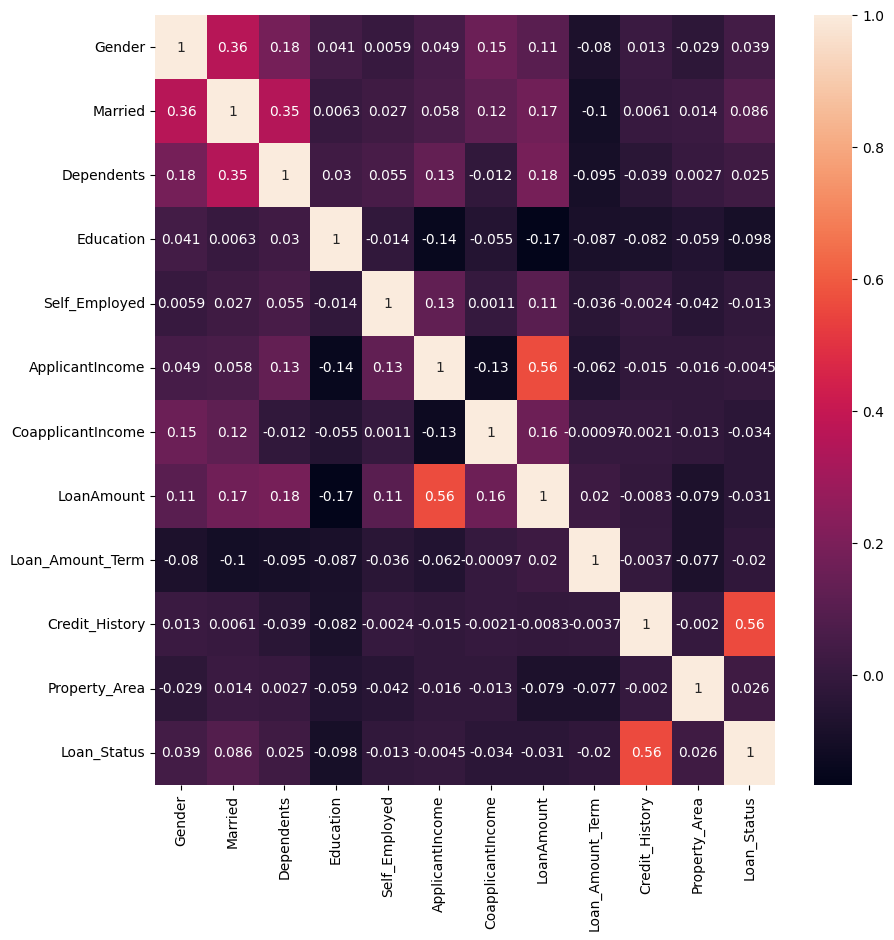

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(encoded_df.corr(), annot = True)

In [45]:
encoded_df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.361578,0.181573,0.041325,0.005868,0.066125,0.220966,0.145744,-0.079595,0.013472,-0.029238,0.039194
Married,0.361578,1.000000,0.352476,0.006266,0.026912,0.017075,0.257606,0.193734,-0.104448,0.006082,0.014193,0.086430
Dependents,0.181573,0.352476,1.000000,0.029882,0.054517,0.137107,-0.014498,0.167544,-0.094818,-0.038702,0.002714,0.024601
Education,0.041325,0.006266,0.029882,1.000000,-0.013871,-0.195837,-0.002892,-0.143568,-0.086550,-0.081822,-0.058673,-0.098340
Self_Employed,0.005868,0.026912,0.054517,-0.013871,1.000000,0.203193,-0.047708,0.104606,-0.035587,-0.002362,-0.041709,-0.013426
ApplicantIncome,0.066125,0.017075,0.137107,-0.195837,0.203193,1.000000,-0.317962,0.494193,-0.054222,0.020010,-0.031766,0.010486
CoapplicantIncome,0.220966,0.257606,-0.014498,-0.002892,-0.047708,-0.317962,1.000000,0.196874,0.010887,-0.005986,-0.058698,0.024975
LoanAmount,0.145744,0.193734,0.167544,-0.143568,0.104606,0.494193,0.196874,1.000000,0.083028,-0.026393,-0.117933,-0.032310
Loan_Amount_Term,-0.079595,-0.104448,-0.094818,-0.086550,-0.035587,-0.054222,0.010887,0.083028,1.000000,-0.003735,-0.076754,-0.019790
Credit_History,0.013472,0.006082,-0.038702,-0.081822,-0.002362,0.020010,-0.005986,-0.026393,-0.003735,1.000000,-0.001969,0.561678


AFTER LOGARITHMIC TRANSFORMATION

<Axes: >

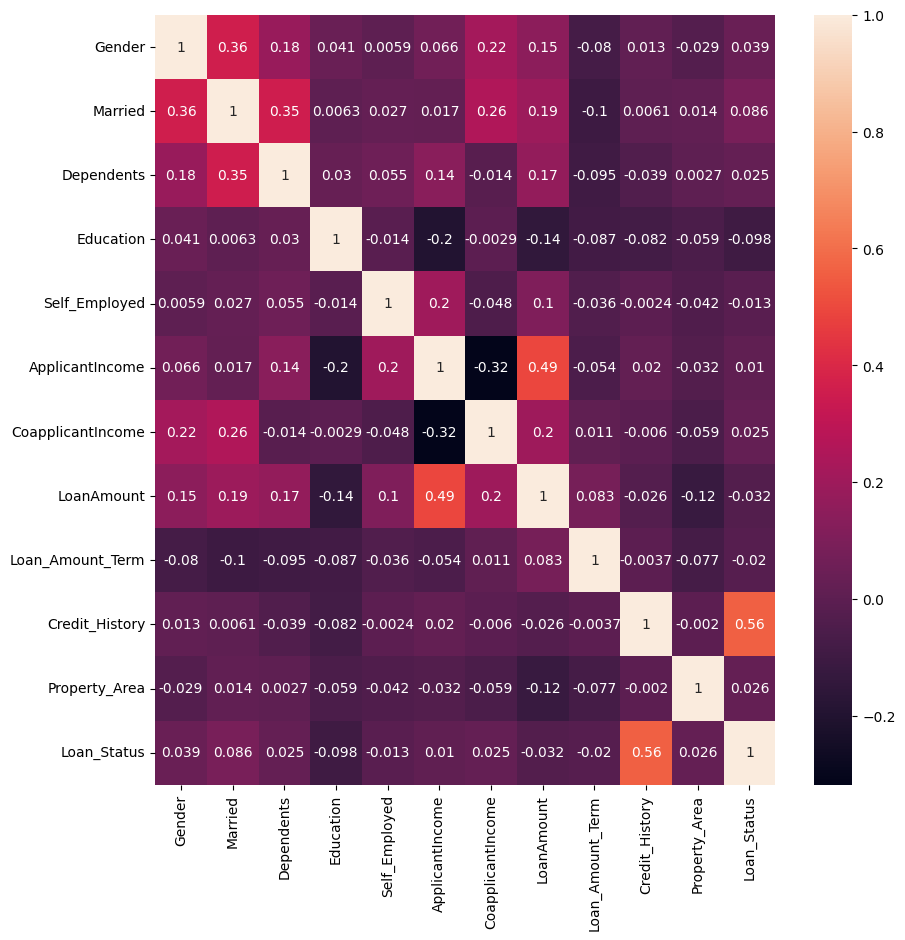

In [46]:
plt.figure(figsize = (10,10))
sns.heatmap(encoded_df.corr(), annot = True)


**OBSERVATION**:

- Gender has a moderate positive correlation with being married (0.3616) and a weak positive correlation with the number of dependents (0.1816). However, the correlation between gender and other variables is generally weak.

- Married individuals have a moderate positive correlation with being self-employed (0.0269) and a weak positive correlation with the loan amount (0.1937). They also have a weak positive correlation with credit history (0.0061) and property area (0.0142).

- The number of dependents has a weak positive correlation with being self-employed (0.0545) and a weak positive correlation with the loan amount (0.1675).

- Education does not have strong correlations with most of the variables, except for a weak negative correlation with applicant income (-0.1958), indicating that higher education levels are associated with lower applicant incomes.

- Self-employed individuals have a weak positive correlation with the loan amount (0.1046) and property area (-0.0417). They also have a weak positive correlation with credit history (-0.0024).

- Applicant income has a weak positive correlation with the loan amount (0.4942) and a weak negative correlation with education level (-0.1958).

- Coapplicant income has a weak negative correlation with being married (-0.1417) and a weak negative correlation with property area (-0.0235).

- Loan amount has a moderate positive correlation with applicant income (0.4942) and a weak positive correlation with being married (0.1937).

- Credit history has a moderate positive correlation with loan status (0.5617), indicating that a good credit history is likely to result in loan approval.

- Property area has a weak positive correlation with loan status (0.0262), suggesting that the location of the property may have some influence on loan approval.

- Loan status has a moderate positive correlation with credit history (0.5617), indicating that a good credit history is likely to result in loan approval.
- Loan status has a weak positive correlation with property area (0.0262), suggesting that the location of the property may have some influence on loan approval.

# **Feature selection and ML implementation :**

In [47]:
# Splitting features

x = encoded_df.drop(columns = 'Loan_Status')
y = encoded_df['Loan_Status']

print(x.shape)
print(y.shape)

#Using stratify is useful when you have imbalanced classes in your dataset,
#meaning that one class has significantly more samples than the other.
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2, stratify=y, random_state= 2)

print(x.info())
print(y.info())

(564, 11)
(564,)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 564 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             564 non-null    int64  
 1   Married            564 non-null    int64  
 2   Dependents         564 non-null    int64  
 3   Education          564 non-null    int64  
 4   Self_Employed      564 non-null    int64  
 5   ApplicantIncome    564 non-null    float64
 6   CoapplicantIncome  564 non-null    float64
 7   LoanAmount         564 non-null    float64
 8   Loan_Amount_Term   564 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      564 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 52.9 KB
None
<class 'pandas.core.series.Series'>
Int64Index: 564 entries, 0 to 613
Series name: Loan_Status
Non-Null Count  Dtype
--------------  -----
564 non-null    int64
dtypes: int64(1)
memory usage: 8.8 KB

## **MODEL 1**

In [48]:
model1 = DecisionTreeClassifier() # Model implementation
model1.fit(x_train,y_train)       #Fitting the model
y_pred = model1.predict(x_train)  #Prediction of y feature using x train
a = accuracy_score(y_train,y_pred)
f = f1_score(y_train,y_pred)
#Explanation :  We are predicting Y using X(Training dataset) and then comparing
#               the Y(Train) with Y(Predicted)


print("The accuracy score of Training dataset is : ",a )
print("The f1 score of Training dataset is : ",f )


The accuracy score of Training dataset is :  1.0
The f1 score of Training dataset is :  1.0


On training data the model performs exceptionally well, to check how the model performs on unseen data we will use cross validation.

Cross-validation is a technique used in machine learning to assess the performance of a model on unseen data. It involves dividing the available dataset into multiple subsets or folds. The model is trained on a portion of the data called the training set and then evaluated on the remaining portion called the validation set. This process is repeated for each fold, and the performance metrics are averaged to provide a more reliable estimate of the model's performance.

In [49]:
#cross validation

a_c = cross_val_score(model1,x_train,y_train,cv = 5, scoring = 'accuracy').mean()
f_c = cross_val_score(model1,x_train,y_train, cv = 5, scoring = 'f1_macro').mean()
#           cv =number of folds,scoring = 'what kind of score you want',.mean() = calculate the mean of folds

print("The validation mean accuracy score",a_c)
print("The validation mean f1 score",f_c)

The validation mean accuracy score 0.7182661782661782
The validation mean f1 score 0.6570024120104647


**Training Accuracy > Test Accuracy** with default settings of Decision Tree classifier. Hence, model is **overfit**.

1. **Overfitting** :

  - Overfitting refers to a situation where the model learns the training data too well,An overfit model becomes too complex and overly specialized to the training data, leading to poor generalization to new, unseen data.
  - Signs of overfitting include high accuracy or performance on the training data but lower performance on the test or validation data.

2. **Underfitting** :
 -  Underfitting occurs when a model is too simple or lacks the capacity to capture the underlying patterns in the training data.
  - An underfit model fails to capture the complexity of the data and performs poorly both on the training and test data.
  - Signs of underfitting include low accuracy or performance on both the training and test data.

Hyper parameter tuning

<Axes: xlabel='Max_Depth', ylabel='Values'>

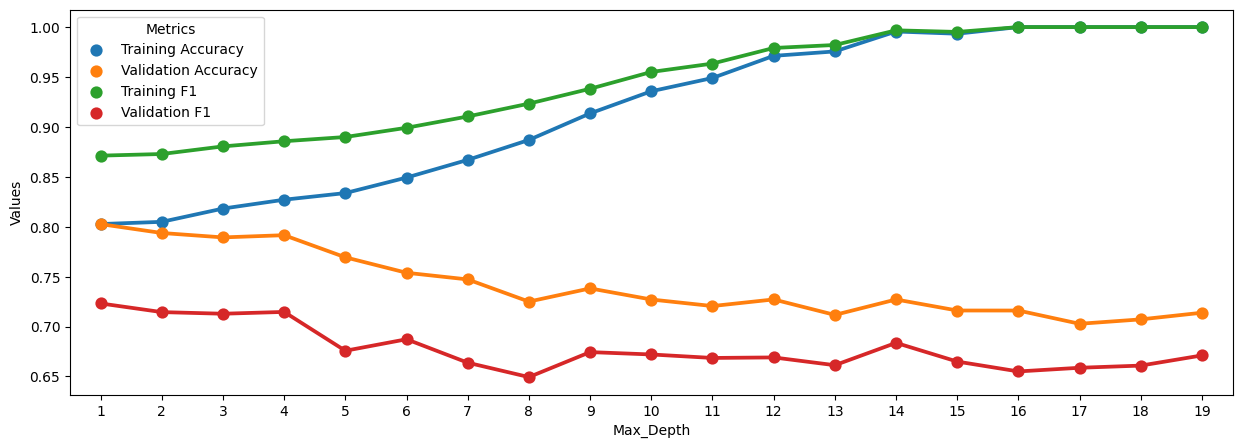

In [50]:
#Let's tune Max_depth first:

#Creating list to append later

training_accuracy = [] #Training accuracy score
validation_accuracy = []      #Validation accuracy score
training_score_f1 = []  #Training f1 score
validation_score_f1= []        #validation f1 score
tree_depths = []  #Depth of tree


for depth in range(1,20):
  model1 = DecisionTreeClassifier(max_depth = depth)
  model1.fit(x_train,y_train)
  y_pred = model1.predict(x_train)
#scores on training data
  training_acc = accuracy_score(y_pred,y_train)
  train_f1 = f1_score(y_pred,y_train)
#scores on validation data
  val_acc = cross_val_score(model1,x_train,y_train, cv = 5, scoring = 'accuracy').mean()
  val_f1 = cross_val_score(model1,x_train,y_train, cv = 5, scoring = 'f1_macro').mean()
#appending them into list
  training_accuracy.append(training_acc)
  validation_accuracy.append(val_acc)
  training_score_f1.append(train_f1)
  validation_score_f1.append(val_f1)
  tree_depths.append(depth)

# creating recieved data into a dataframe for visualisation
Tuning_Max_depth = {"Training Accuracy": training_accuracy, "Validation Accuracy": validation_accuracy, "Training F1": training_score_f1, "Validation F1":validation_score_f1, "Max_Depth": tree_depths }
Tuning_Max_depth_df = pd.DataFrame.from_dict(Tuning_Max_depth)


plot_df = Tuning_Max_depth_df.melt('Max_Depth',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Max_Depth", y="Values",hue="Metrics", data=plot_df,ax=ax)

- melt() function is used to transform the DataFrame from wide format to long format.
- The first argument 'Max_Depth' specifies the column that will remain as the identifier variable.
- The second argument var_name='Metrics' specifies the name of the column that will contain the variable names (metrics in this case).
- The third argument value_name="Values" specifies the name of the column that will contain the corresponding values.

Before melt:

    Training Accuracy  Validation Accuracy  Training F1  Validation F1  Max_Depth
    0           0.800000             0.750000     0.750000       0.700000          1
    1           0.850000             0.800000     0.800000       0.750000          2
    2           0.900000             0.820000     0.850000       0.780000          3
    3           0.920000             0.810000     0.900000       0.790000          4
    4           0.940000             0.800000     0.920000       0.780000          5








After melt:

          Max_Depth     Metrics           Values
    0           1    Training Accuracy    0.800000
    1           2    Training Accuracy    0.850000
    2           3    Training Accuracy    0.900000
    3           4    Training Accuracy    0.920000
    4           5    Training Accuracy    0.940000
    5           1  Validation Accuracy    0.750000
    6           2  Validation Accuracy    0.800000
    7           3  Validation Accuracy    0.820000
    8           4  Validation Accuracy    0.810000
    9           5  Validation Accuracy    0.800000
    10          1         Training F1    0.750000
    11          2         Training F1    0.800000
    12          3         Training F1    0.850000
    13          4         Training F1    0.900000
    14          5         Training F1    0.920000
    15


we can conclude that keeping 'Max_Depth' = 4 will give the best result

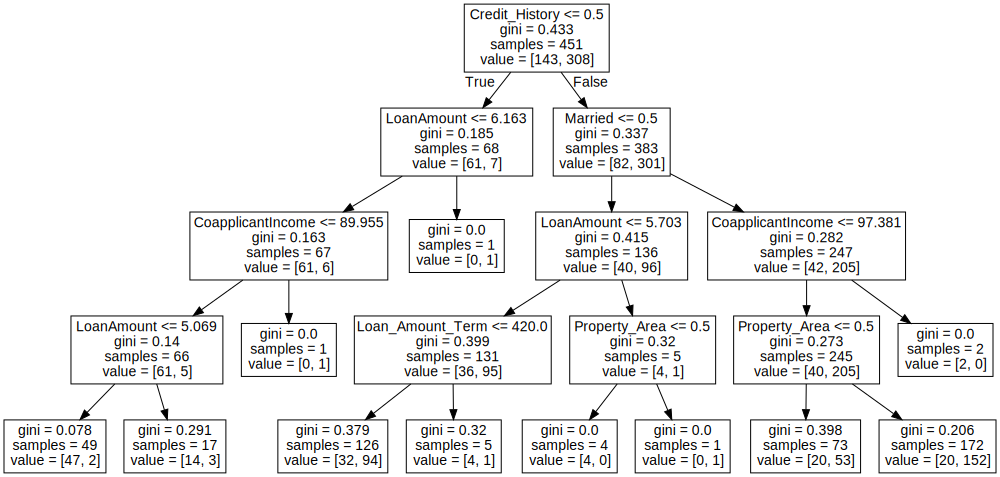

In [53]:
model1_tree = tree.DecisionTreeClassifier(max_depth = 4)
model1_tree.fit(x_train,y_train)
tree_Data = tree.export_graphviz(model1_tree,feature_names = x.columns.tolist())
graph = graphviz.Source(tree_Data)
graph

some leaf nodes has less than 5 samples

Having leaf nodes with only a few samples can contribute to overfitting because the decision tree may become too specific and make predictions based on a small subset of the training data, which may not generalize well to unseen data.



<Axes: xlabel='min_leaf_samples', ylabel='Values'>

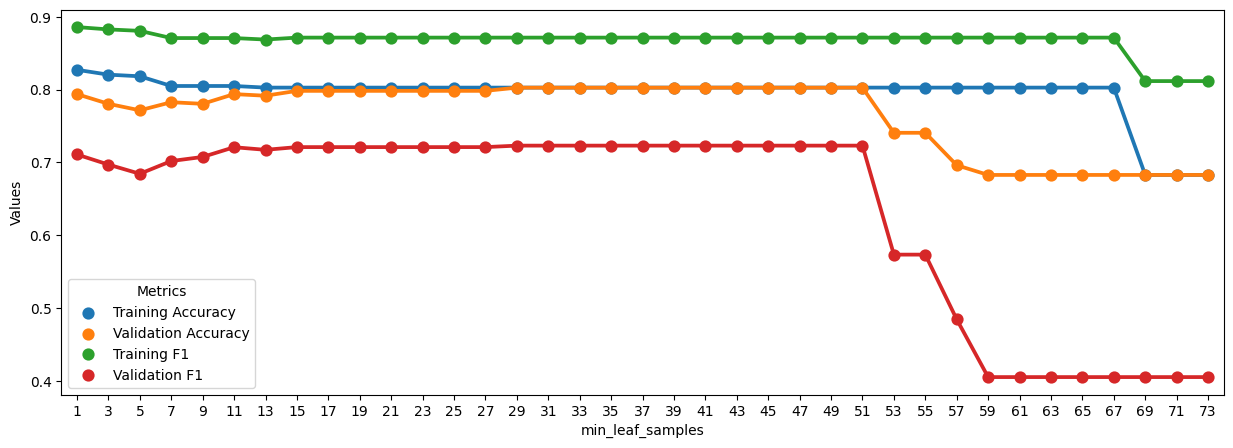

In [69]:
training_accuracy2 = []
validation_accuracy2 = []
training_score_f1_2= []
validation_score_f1_2= []
min_leaf_samples = []

for leaf in range(1,75,2):
  model1 = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = leaf)
  model1.fit(x_train,y_train)
  y_pred = model1.predict(x_train)
  train_accu_2 = accuracy_score(y_pred,y_train)
  train_f1_2 = f1_score(y_pred,y_train)
  valid_accu_2 = cross_val_score(model1,x_train,y_train, cv = 5, scoring = "accuracy").mean()
  valid_f1_2 = cross_val_score(model1,x_train,y_train,cv = 5, scoring = "f1_macro").mean()

  #Appending

  training_accuracy2.append(train_accu_2)
  validation_accuracy2.append(valid_accu_2)
  training_score_f1_2.append(train_f1_2)
  validation_score_f1_2.append(valid_f1_2)
  min_leaf_samples.append(leaf)

  #creating a dataframe
tuning_leaf =  {"Training Accuracy": training_accuracy2, "Validation Accuracy": validation_accuracy2, "Training F1": training_score_f1_2, "Validation F1":validation_score_f1_2, "min_leaf_samples": min_leaf_samples }
tuning_leaf_df = pd.DataFrame.from_dict(tuning_leaf)

#plotting

plot_df2 = tuning_leaf_df.melt('min_leaf_samples', var_name = 'Metrics', value_name = "Values")
fig,ax = plt.subplots(figsize = (15,5))
sns.pointplot(x = 'min_leaf_samples', y = 'Values', hue = 'Metrics', data = plot_df2,ax = ax)

We can use 50 as Min_sample_leaf

# **Model valuation on unseen data :**

In [73]:
model = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 50)
model.fit(x_train,y_train)
#Using unseen data
y_pred = model.predict(x_test)
accuracy_unseen = accuracy_score(y_test,y_pred)
f1score_unseen = f1_score(y_test,y_pred)


print("The accuracy score for unseen data", accuracy_unseen)
print("The F1 score for unseen data",f1score_unseen)

The accuracy score for unseen data 0.8672566371681416
The F1 score for unseen data 0.911242603550296


The accuracy score represents the percentage of correctly predicted instances out of all the instances in the unseen data. In this case, the model achieved an accuracy score of 0.867, which means it correctly predicted approximately 86.7% of the instances in the unseen data.

The F1 score is a measure of the model's accuracy, taking into account both precision and recall. It provides a single value that balances both precision and recall, with a higher score indicating better performance. In this case, the model achieved an F1 score of 0.911, which indicates that it has a good balance between precision and recall on the unseen data.

These scores suggest that the model is performing well on unseen data, with a relatively high accuracy and a balanced F1 score.

# **Conclusion**

In this project, I worked on a loan prediction problem. I began by preprocessing the data, handling missing values, and encoding categorical variables. I also applied transformations to handle skewness and standardized the data. During exploratory data analysis, I examined correlations and visualized the data to gain insights. Then, I built a decision tree classifier and evaluated its performance using accuracy and F1 score metrics. I noticed that the model was overfitting, so I performed hyperparameter tuning by varying the max_depth parameter. The tuned model achieved good accuracy and F1 scores on unseen data, indicating its effectiveness. However, I was cautious about overfitting and made efforts to find the optimal depth. Overall, I successfully processed the data, built a classifier, and mitigated overfitting to make accurate loan predictions.